# <a href = "https://dacon.io/competitions/open/235610/overview/description">Wine Quality Classification Contest</a>

## Dacon Contest, Orthopedic | Algorithm | beginner

**2023-04-01 ~ 2023-04-30**

### Base Line Code

- index 구분자
- quality 품질
- fixed acidity 산도
- volatile acidity 휘발성산
- citric acid 시트르산
- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
- chlorides 염화물
- free sulfur dioxide 독립 이산화황
- total sulfur dioxide 총 이산화황
- density 밀도
- pH 수소이온농도
- sulphates 황산염
- alcohol 도수
- type 종류

## EDA

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action = 'ignore')

In [11]:
train = pd.read_csv('/Users/1001l1000/Documents/AI/Dacon/data/Wine Quality Classification/train.csv')
test = pd.read_csv('/Users/1001l1000/Documents/AI/Dacon/data/Wine Quality Classification/test.csv')
sample_submit = pd.read_csv('/Users/1001l1000/Documents/AI/Dacon/data/Wine Quality Classification/sample_submission.csv')

In [12]:
# train 데이터의 개형을 살펴본다.
# index를 제외하면 총 13개 변수를 가진다.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [13]:
train.shape

(5497, 14)

In [14]:
# test 데이터의 개형
# index를 제외하면 총 12개 변수를 가진다.
# train 중 quality 변수가 사라졌다.
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [15]:
test.shape

(1000, 13)

In [16]:
# train 데이터의 열 별 정보
# 결측치는 없다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<Axes: >

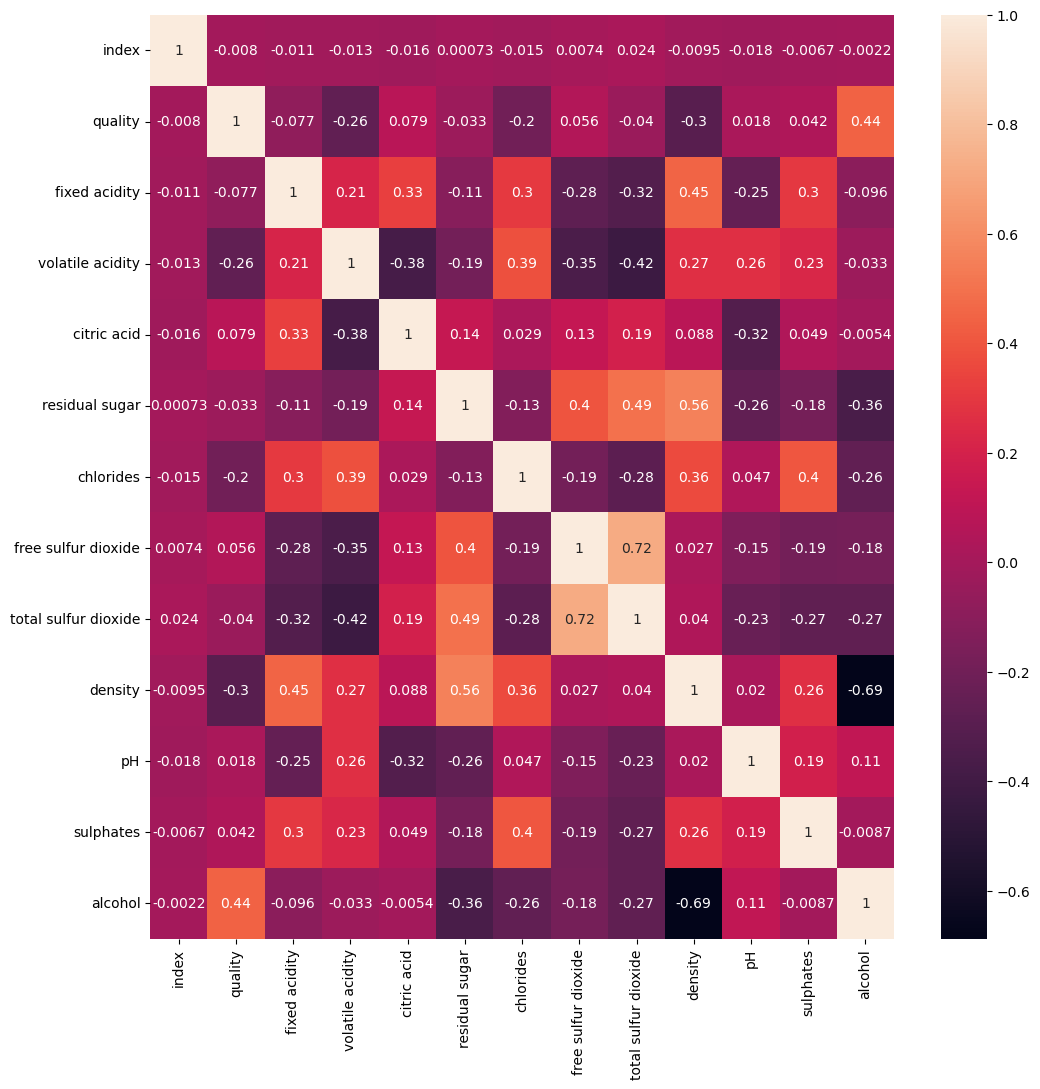

In [17]:
# train의 변수 간 상관관계
plt.figure(figsize = (12,12))
sns.heatmap(data = train.corr(), annot = True)

<Axes: >

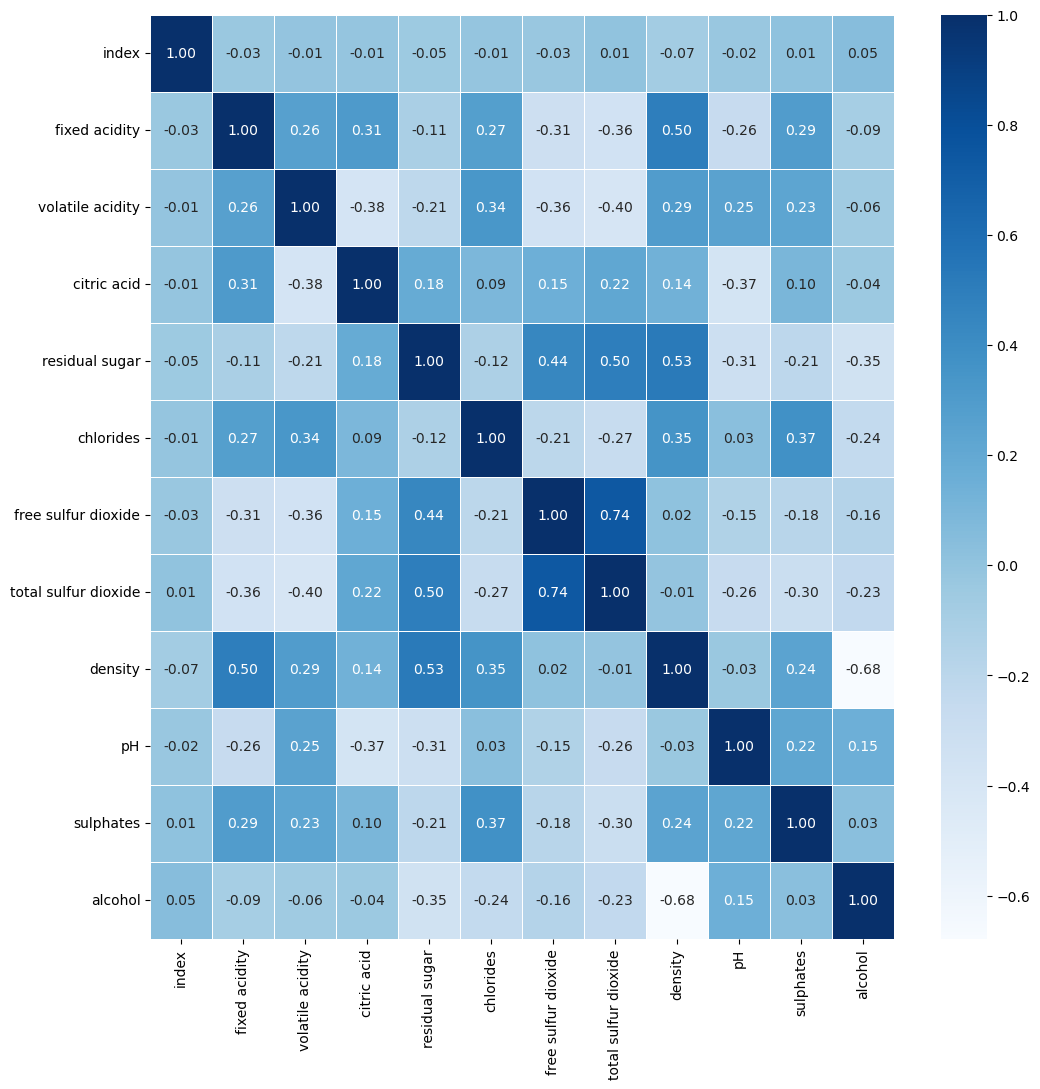

In [18]:
# test의 변수 간 상관관계
plt.figure(figsize = (12,12))
sns.heatmap(data = test.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

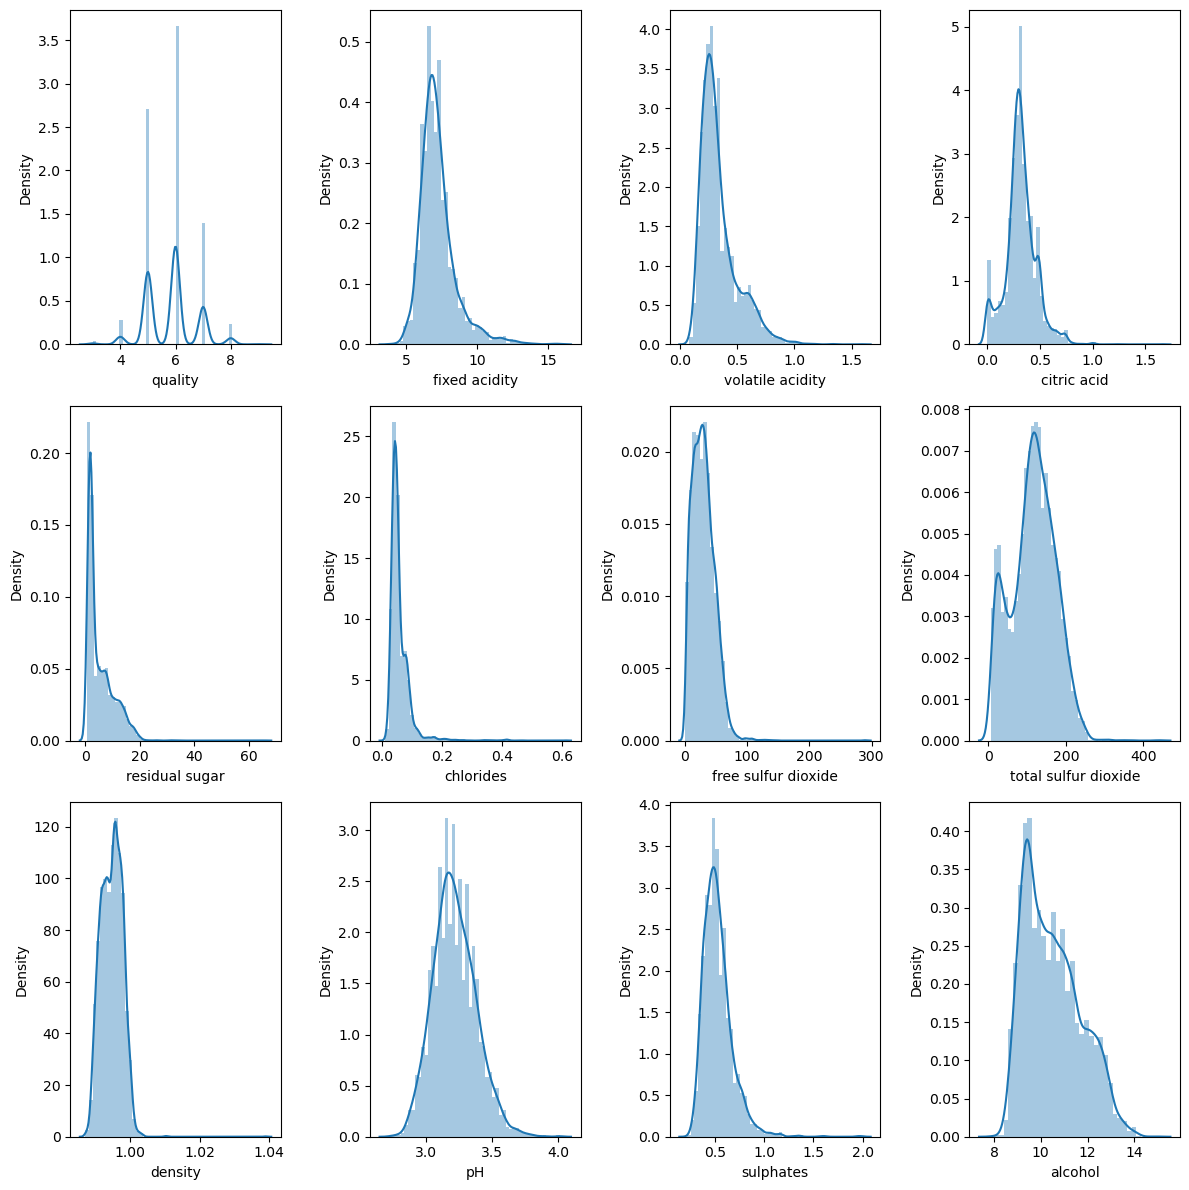

In [19]:
# train의 각 변수별 분포
plt.figure(figsize = (12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

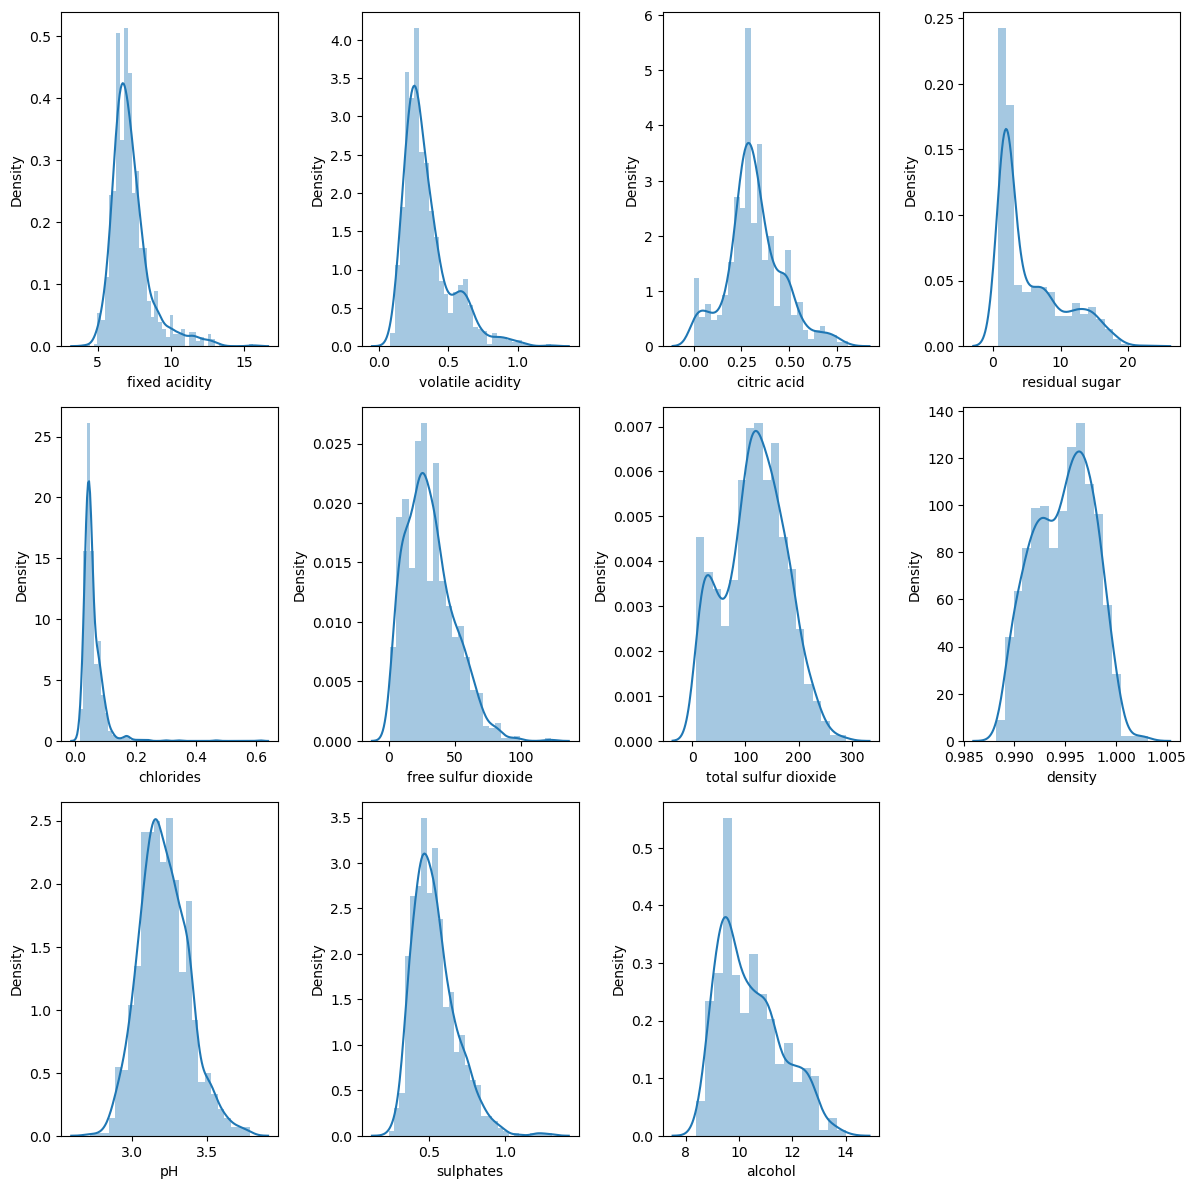

In [20]:
# test의 각 변수별 분포
plt.figure(figsize = (12,12))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.distplot(test.iloc[:,i])
plt.tight_layout()
plt.show()

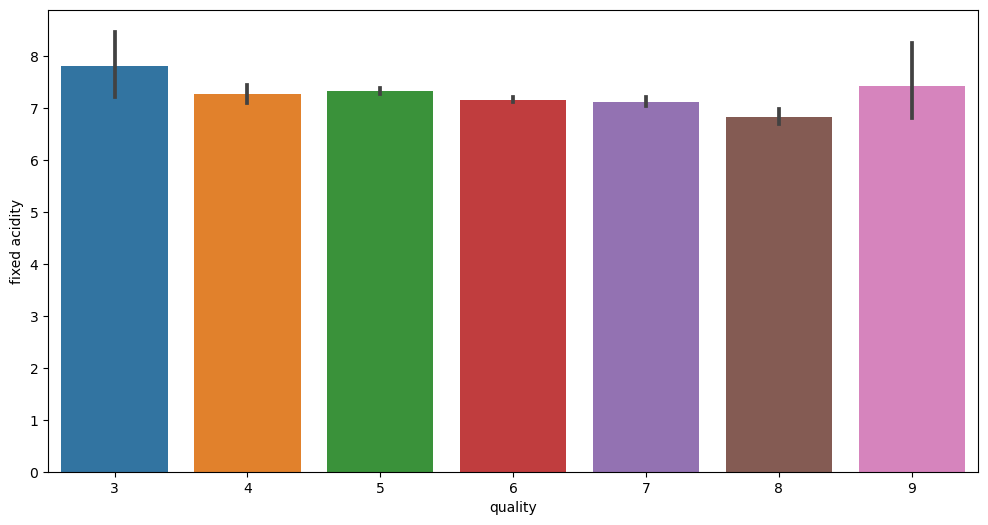

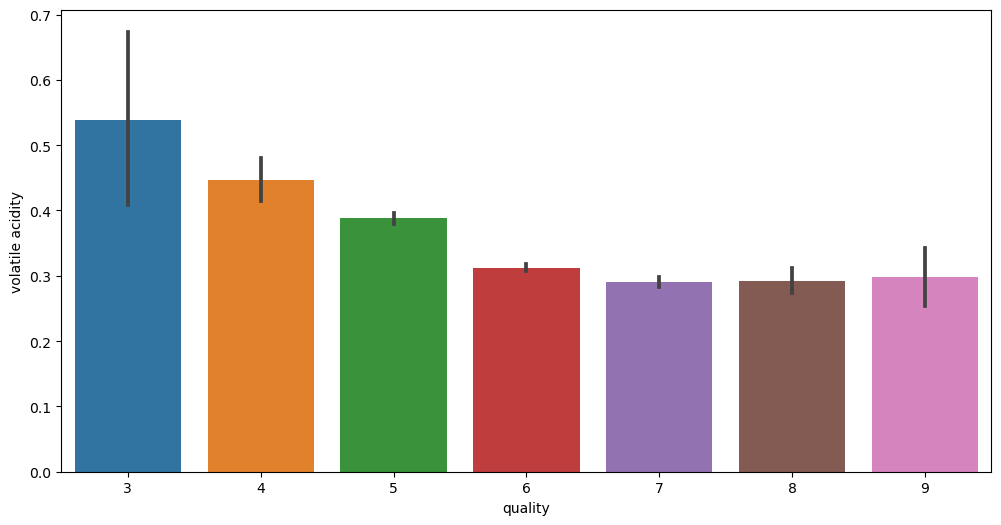

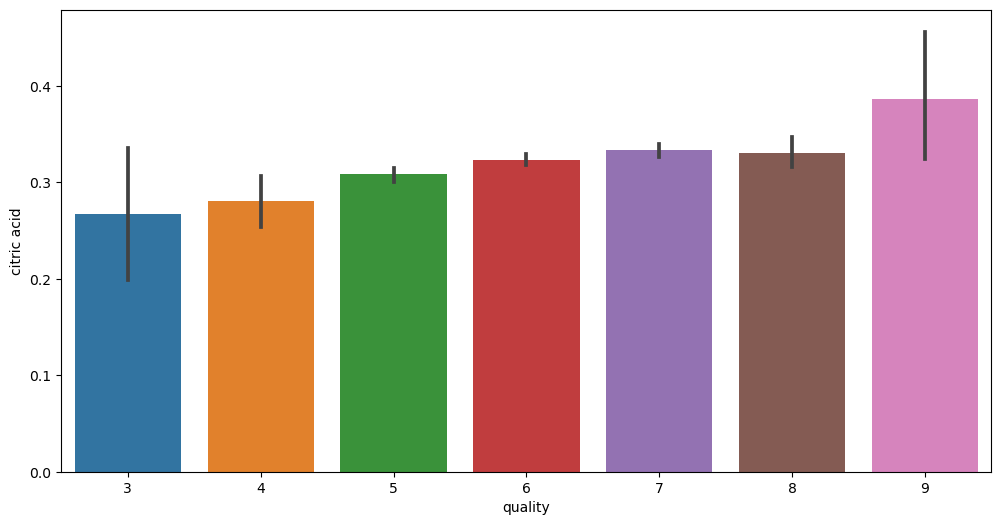

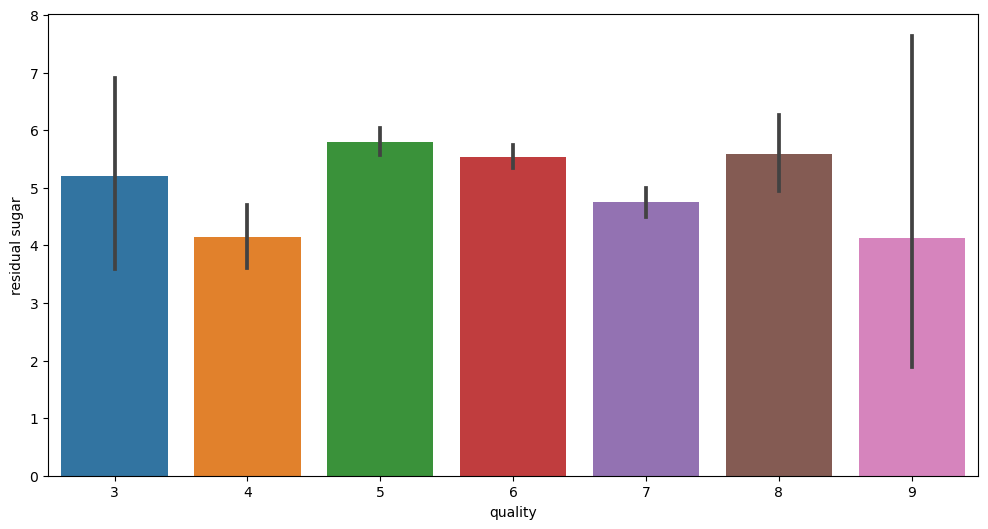

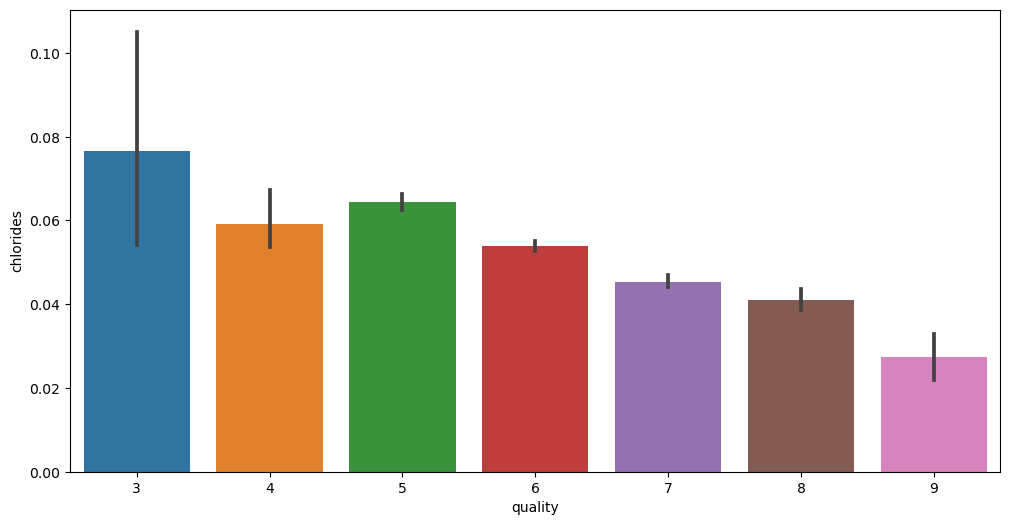

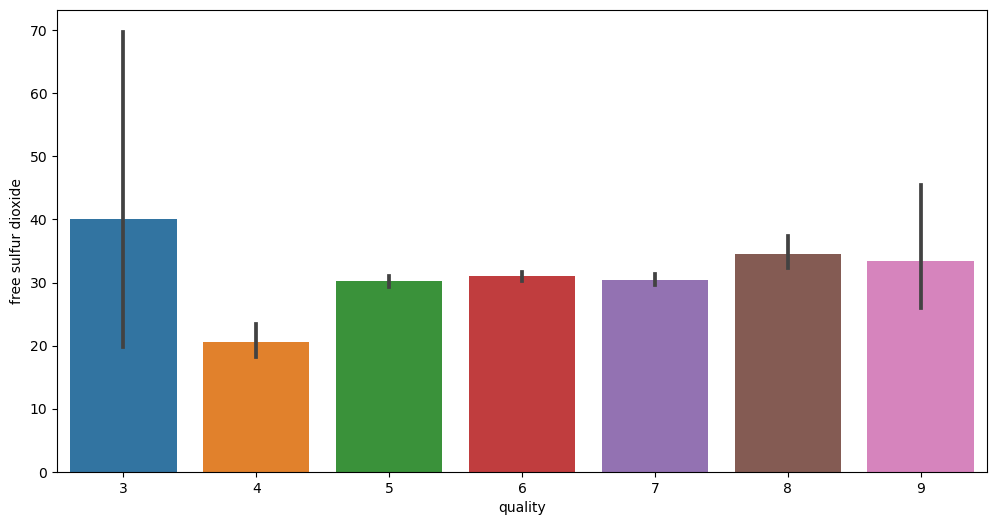

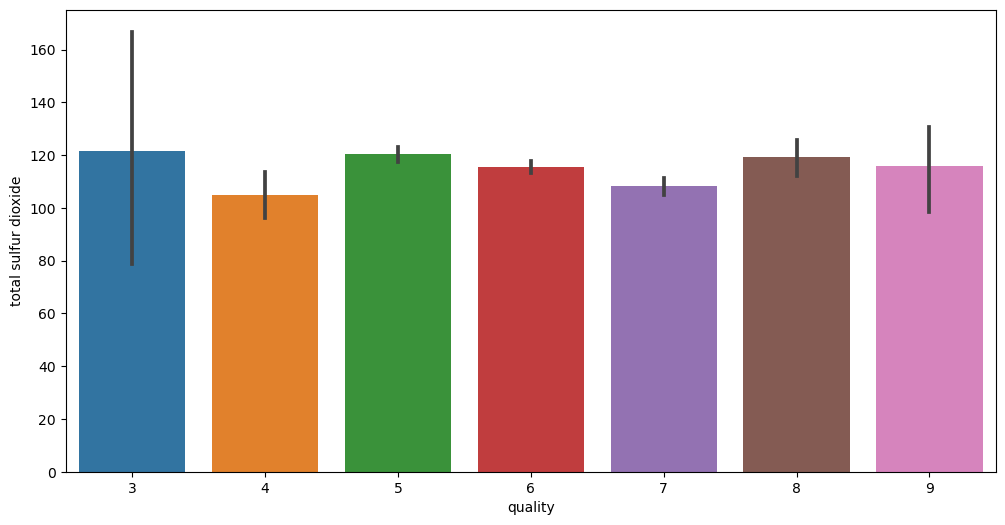

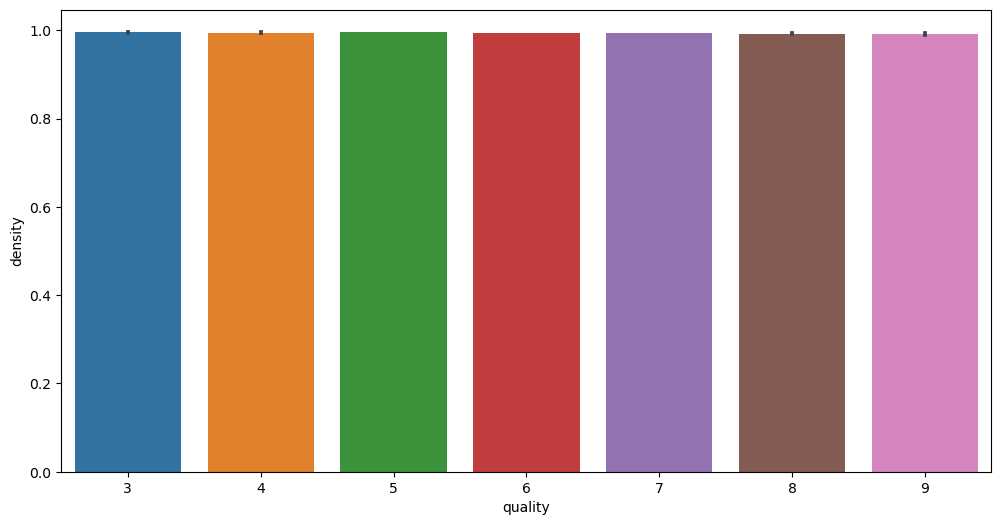

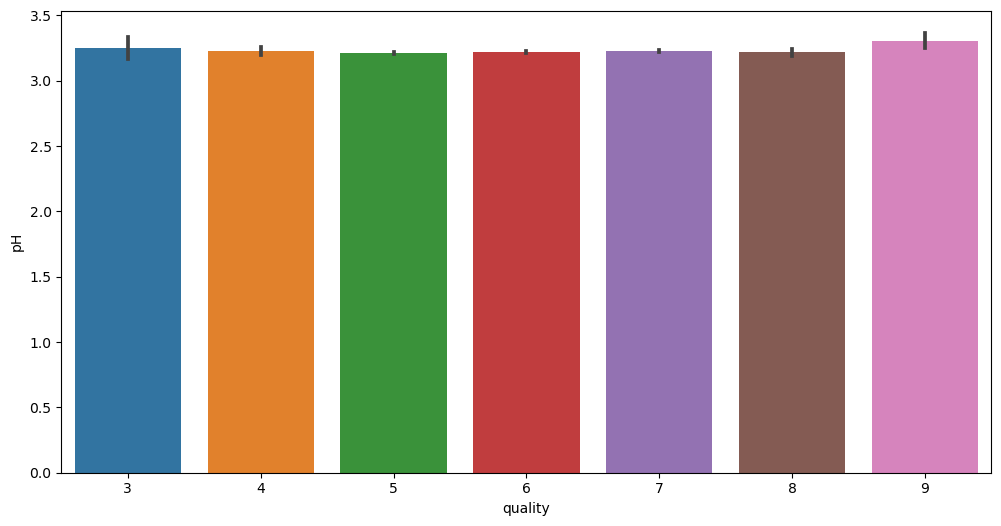

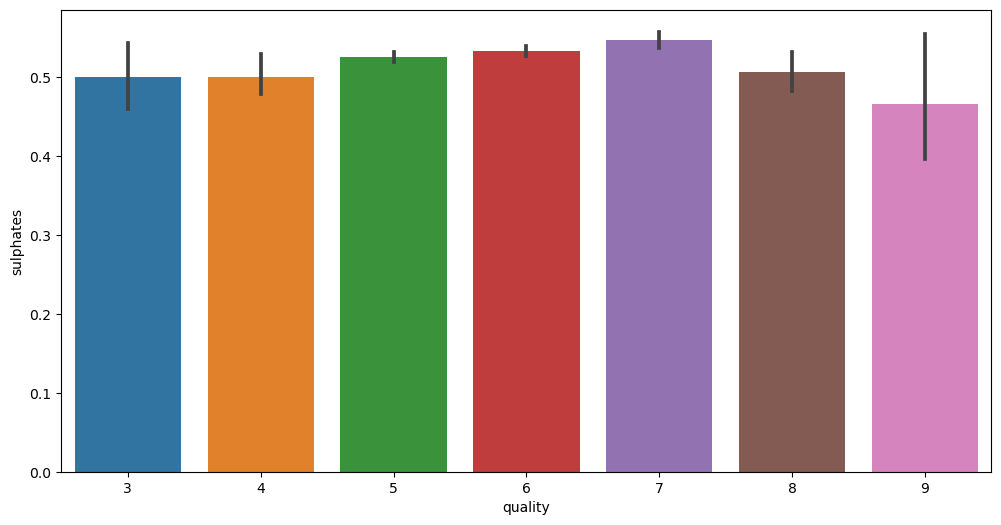

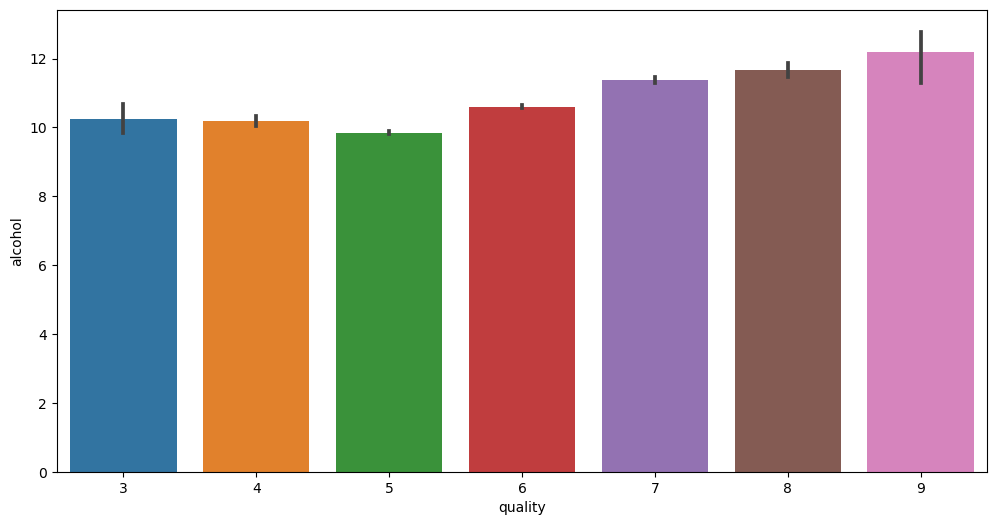

In [21]:
# train에서 각 변수와 quality 변수 사이 분포
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i + 2], data = train)

## Basic Analysis + Cleaning
## EDA & VIZ

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


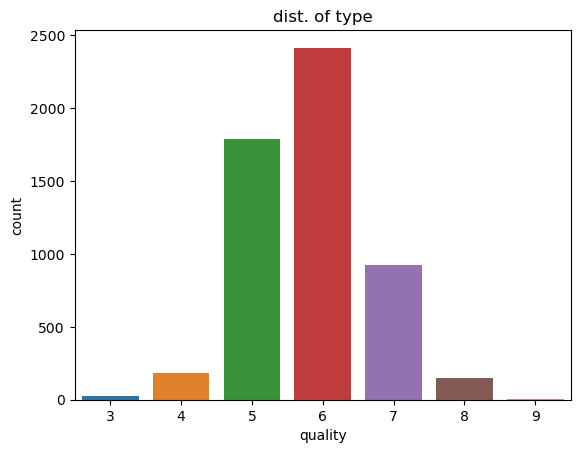

In [22]:
print(train['quality'].value_counts())
sns.countplot(x = train['quality']);
plt.title("dist. of type", fontsize = 12);

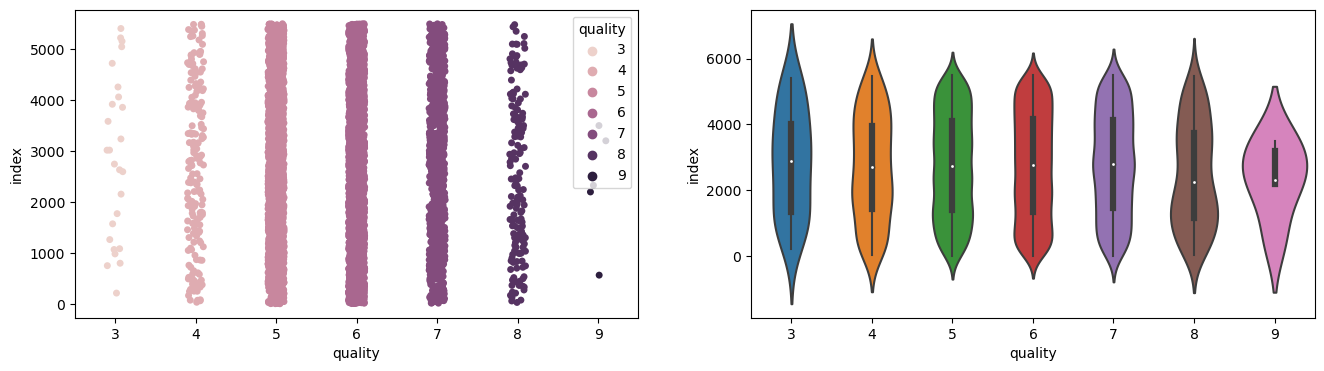

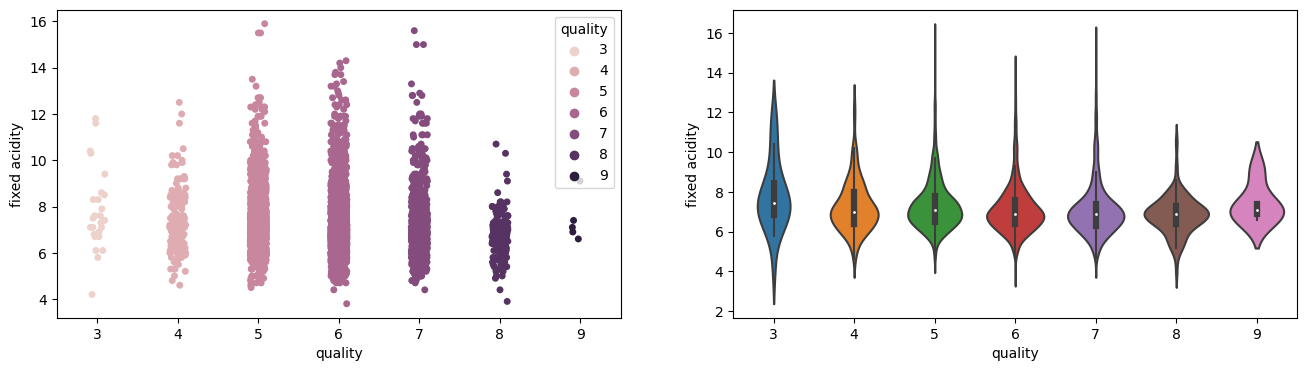

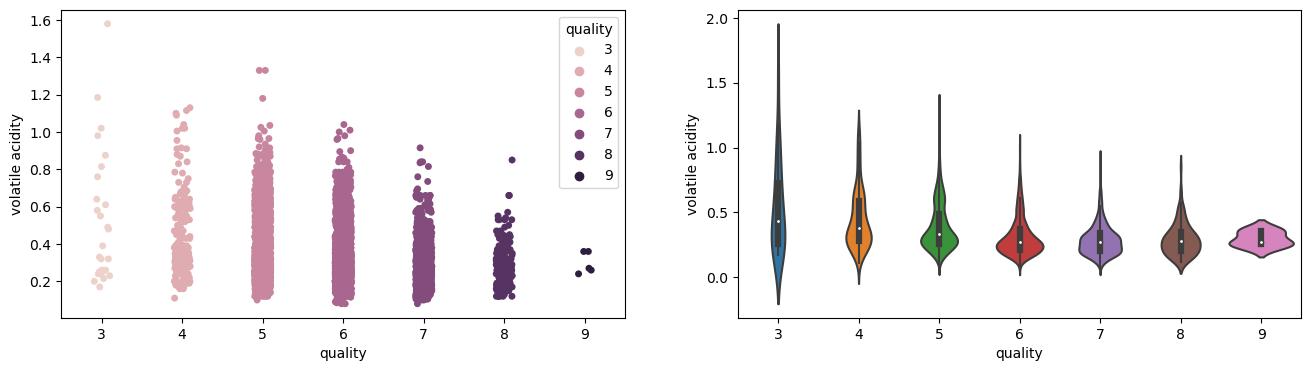

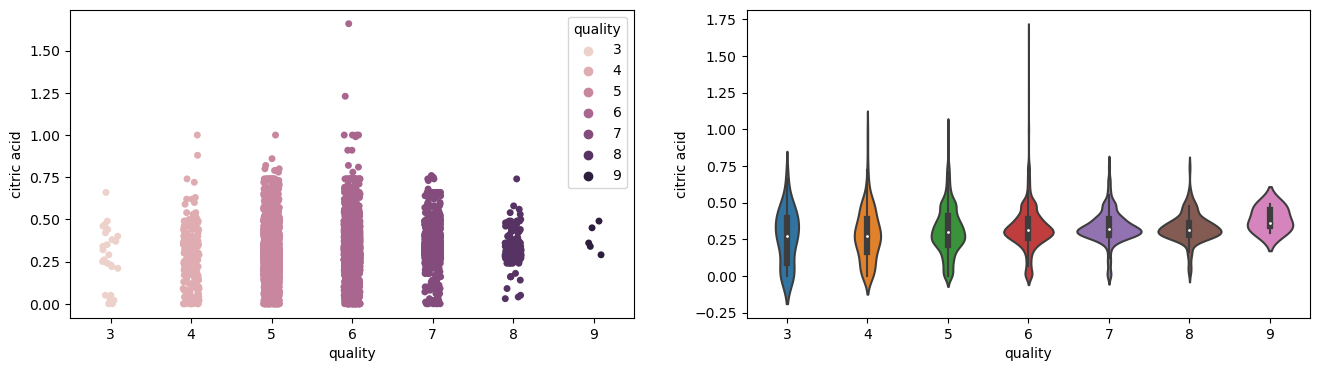

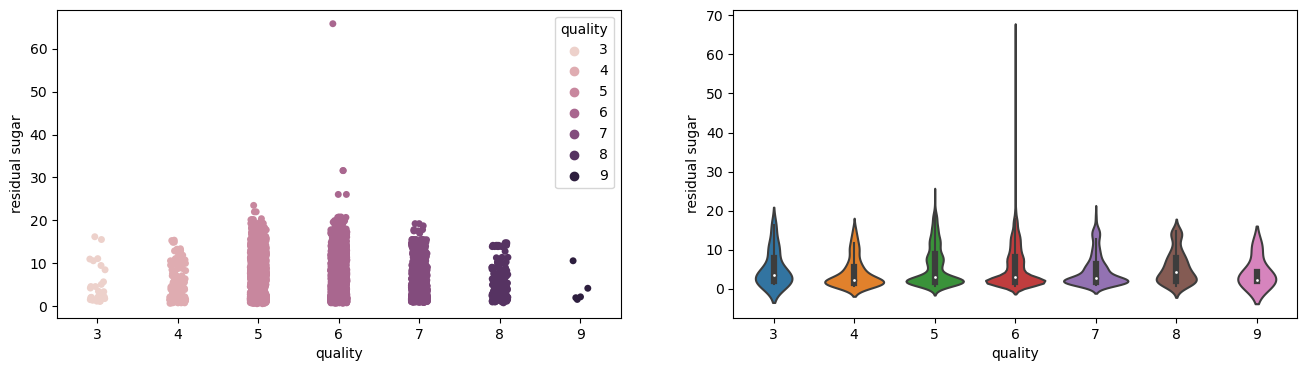

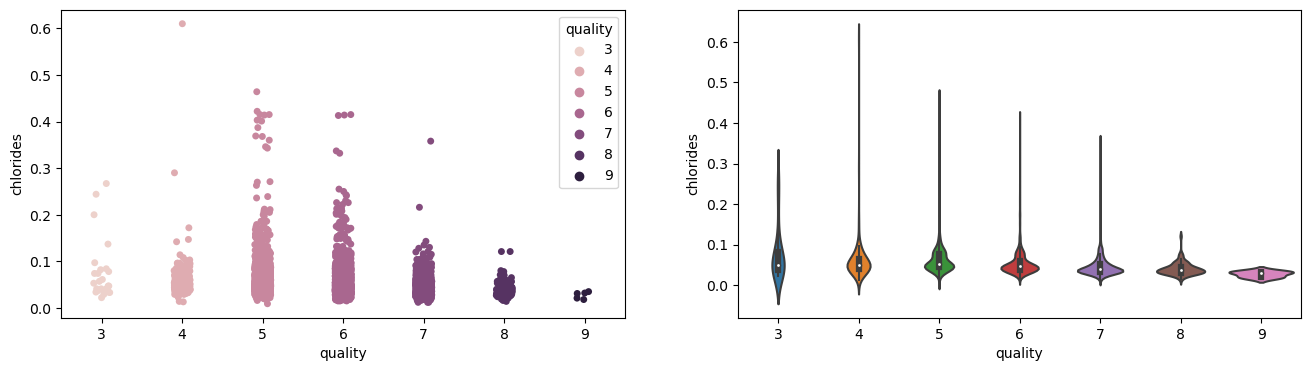

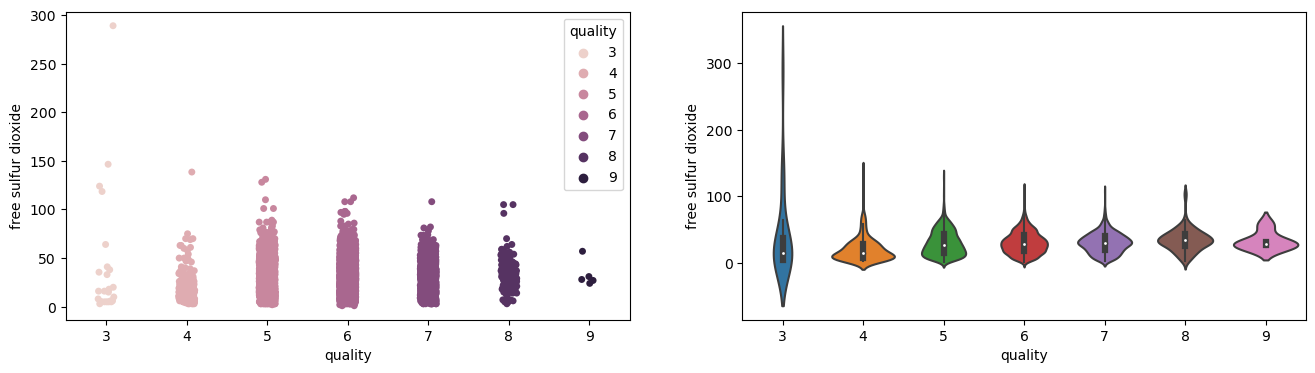

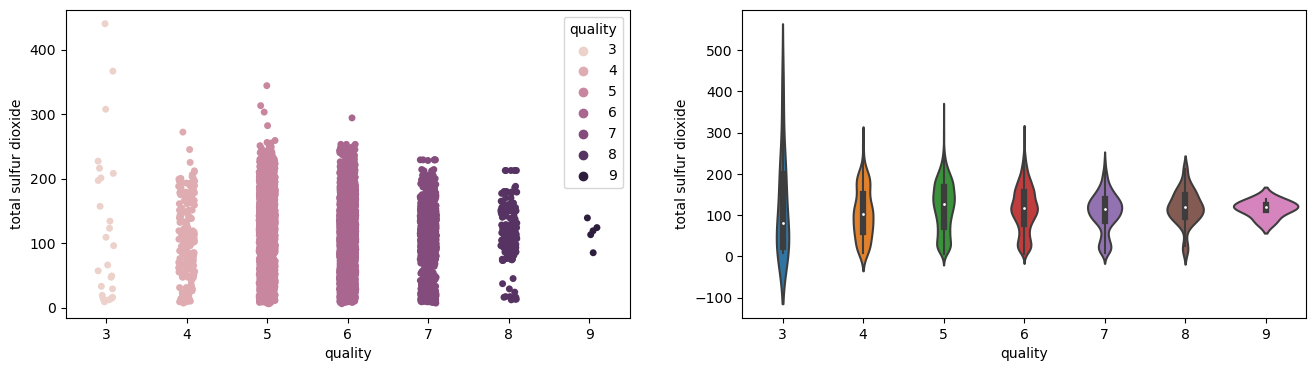

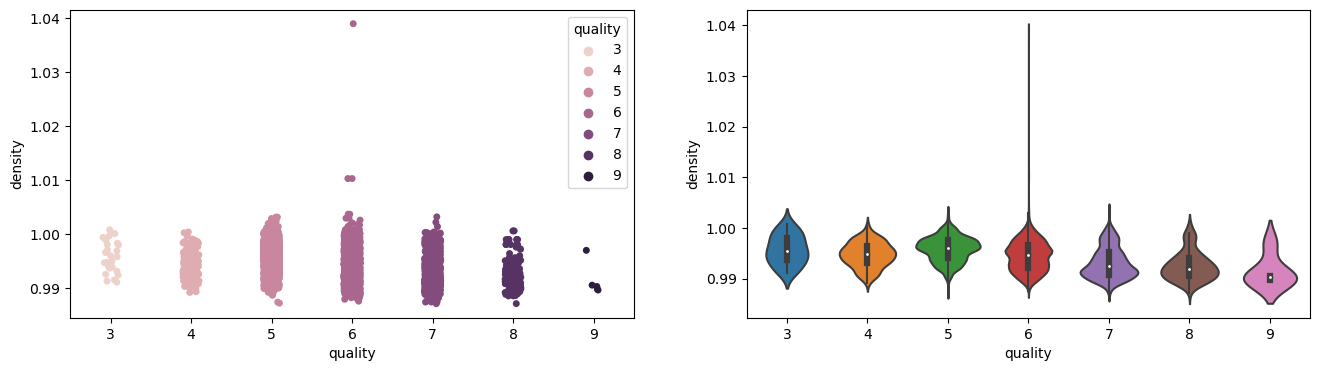

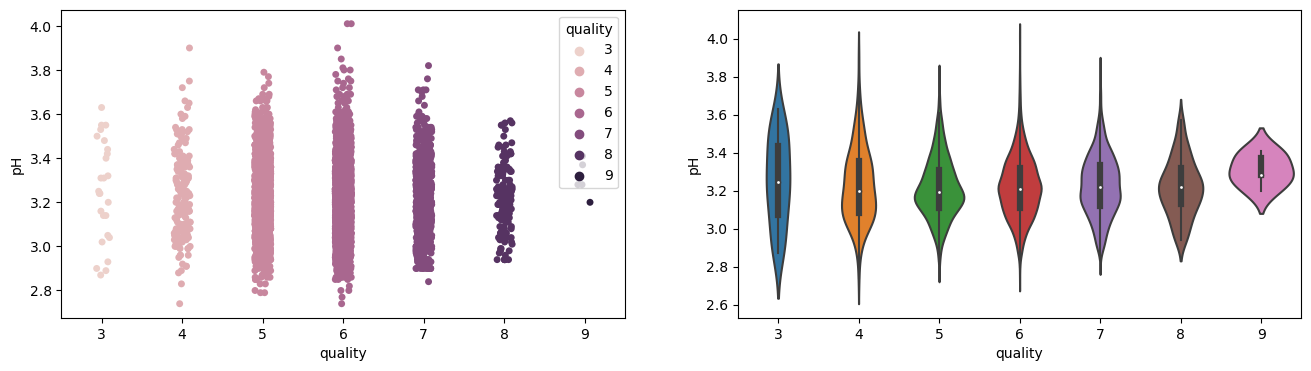

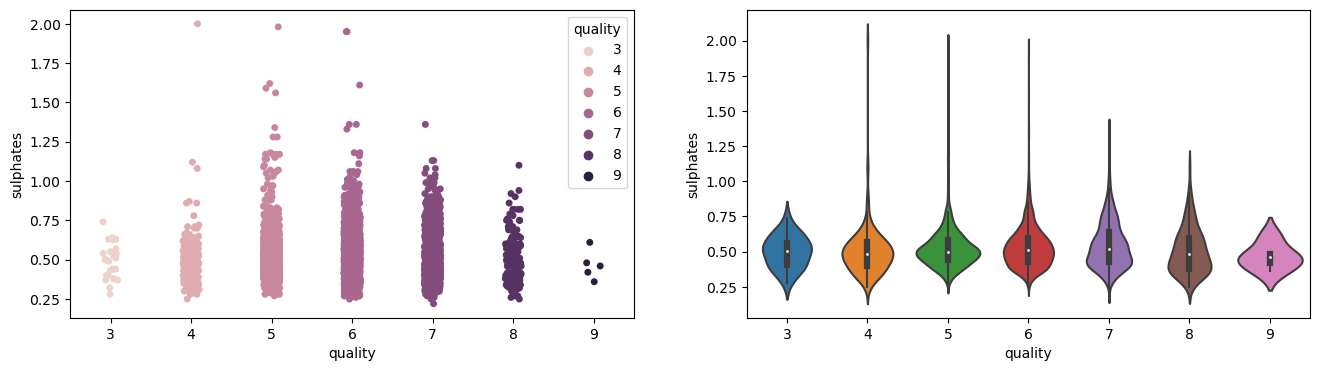

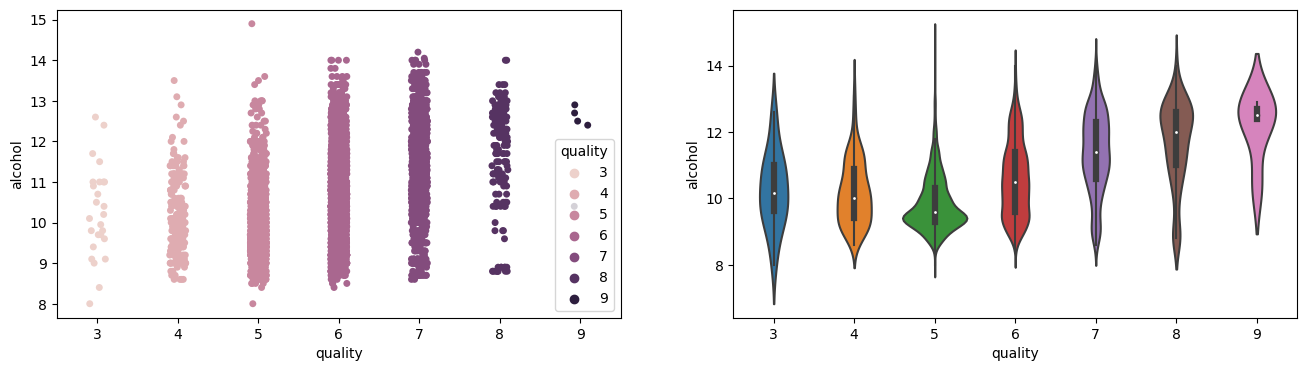

In [23]:
# distribution by 'quality'
numerical_columns = train.select_dtypes(exclude ='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize = (16,4))
        sns.stripplot(x = df['quality'],y = df[column], ax = ax[0],hue = df['quality'])
        sns.violinplot(data = df, x ='quality', y = column, ax = ax[1])
        
show_dist_plot(train, numerical_columns)

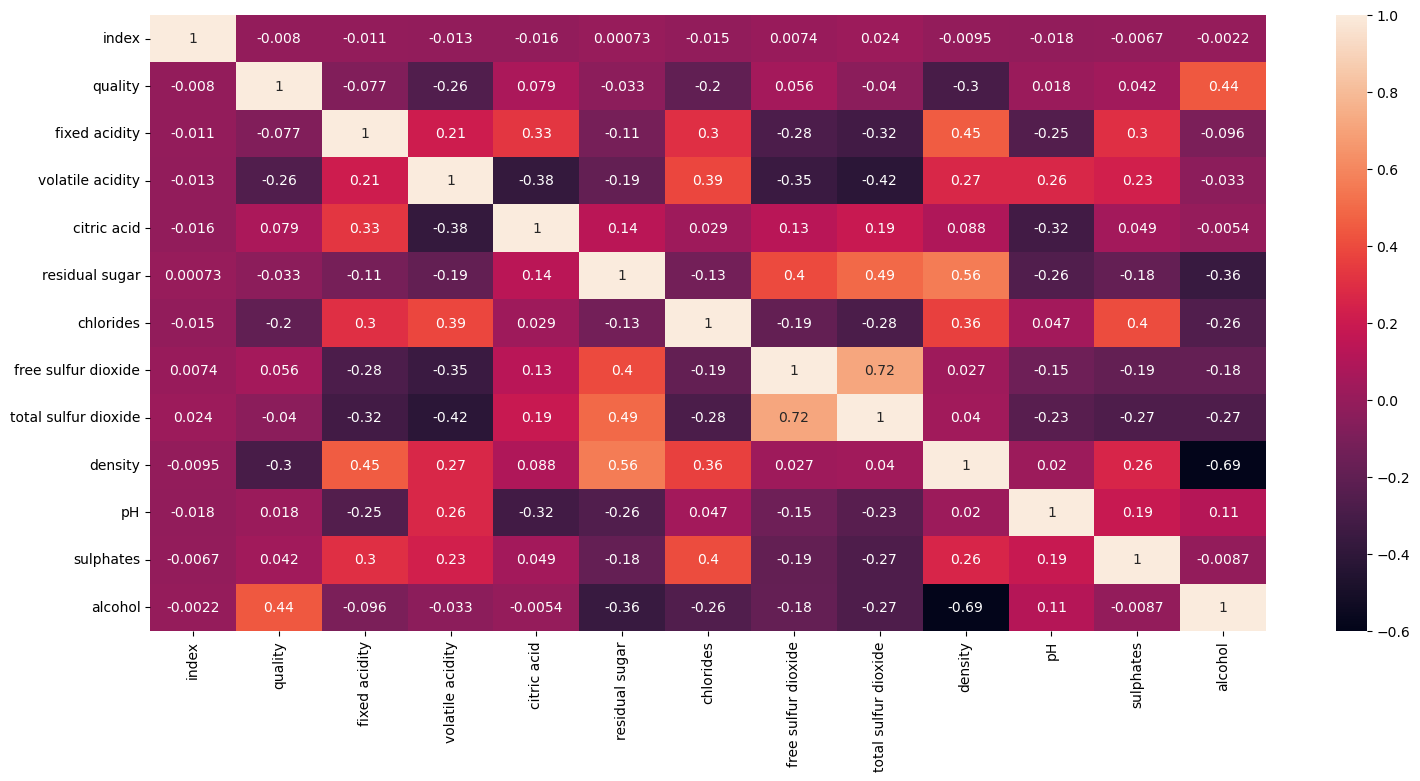

In [24]:
plt.figure(figsize = (18,8))
corr = train.corr()
sns.heatmap(corr, annot = True, square = False, vmin = -.6, vmax = 1.0);

## Modeling 

In [52]:
# Library
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score # plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [53]:
# Standardscaler, 표준화 
ss = StandardScaler()
train[numerical_columns] = ss.fit_transform(train[numerical_columns])
 
# factorize
train['type'] = pd.factorize(train['type'])[0]

train.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.731736,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,-1.731106,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,-1.730475,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0


In [54]:
X = train.drop(['quality'],axis = 1)
y = train.quality

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 42)

In [56]:
X_train.shape, X_test.shape

((4397, 13), (1100, 13))

In [62]:
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    model_train_score = model.score(X_train,y_train)
    model_test_score = model.score(X_test,y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    print("Testing Score\n", score)
    # plot_confusion_matrix(model,X_test,y_test,cmap = 'OrRd')

In [63]:
# RandomForest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
Model(rf)

Testing Score
 0.6790909090909091


In [64]:
#feature의 수가 동일한지 보고, train set에서 다룬 것처럼 testset에서 다루어 줍니다.
X_train.shape, test.shape 

((4397, 13), (1000, 13))

In [70]:
# drop index column
test = test.drop(['index'], axis = 1)

# Standardscaler
ss = StandardScaler()
test[numerical_columns] = ss.fit_transform(test[numerical_columns])

# factorize
test['type'] = pd.factorize(test['type'])[0]

test.head(3)

KeyError: "['index'] not found in axis"

In [66]:
final_pred = rf.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- index


In [71]:
# 분류에 있어 각 피쳐에 대한 중요도 출력
rf.fit(X_train, y_train)
print(rf.feature_importances_)

[0.06887305 0.06983947 0.09295739 0.07365883 0.07713852 0.08276995
 0.0794573  0.084064   0.09313061 0.07673864 0.08135849 0.11586517
 0.00414858]


## Submission

In [73]:
final_pred = rf.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- index


In [72]:
sample_submit['quality'] = final_pred

NameError: name 'final_pred' is not defined